In [5]:
#Imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
#Reading stock data from yahoo
from pandas_datareader.data import DataReader

In [7]:
#For time stamps
from datetime import datetime

In [8]:
#Tech stocks being used for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [9]:
#End and start time for data grab
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [10]:
#For loop to grab yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
#Summary stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,121.108785,118.042300,119.688267,119.588157,1.242252e+08,119.193477
std,12.986333,12.789534,13.010865,12.856530,5.383017e+07,12.974101
min,86.419998,83.144997,83.312500,85.747498,4.669130e+07,85.173584
25%,116.000000,112.730000,114.560001,114.928749,8.816440e+07,114.365368
50%,123.699997,120.419998,122.309998,121.959999,1.110399e+08,121.753189
75%,129.735001,126.785000,128.580002,128.000004,1.507154e+08,127.752335
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [12]:
#General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

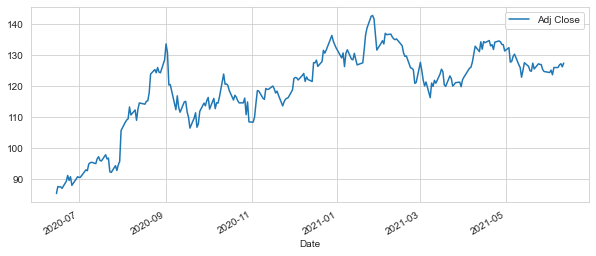

In [13]:
#Historical view of the close price for Apple
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

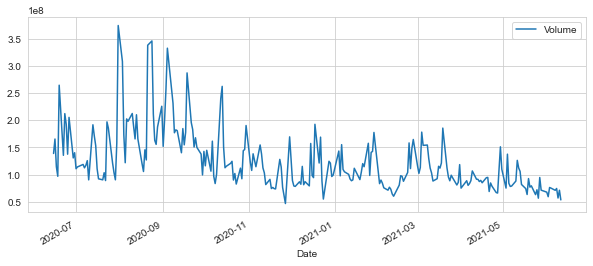

In [14]:
#Plotted the total volume of stock being traded each day over the past 5 years for Apple
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [17]:
#Plotted out some moving averages
ma_day = [7,30,90]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

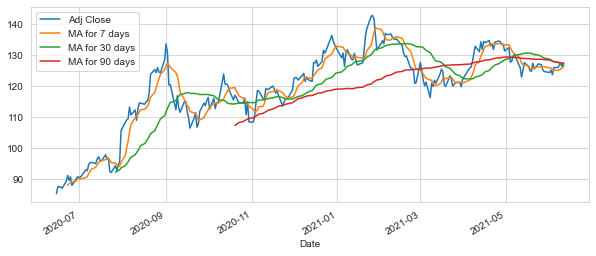

In [18]:
AAPL[['Adj Close','MA for 7 days','MA for 30 days','MA for 90 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

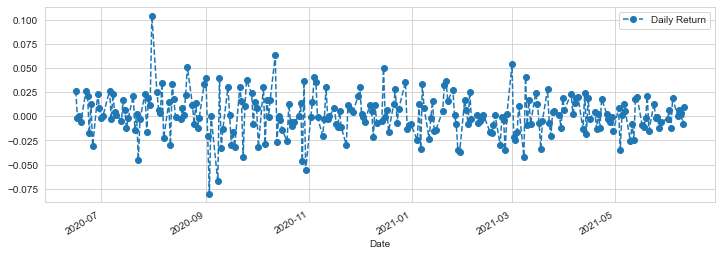

In [19]:
#Percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#Plotted the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:>

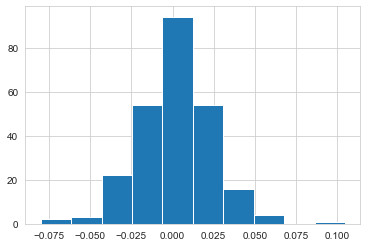

In [25]:
#Made a histogram
AAPL['Daily Return'].hist()

In [26]:
#Closing prices for the tech stock lists into one dataframe
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-15,85.173584,1419.849976,187.128113,2572.679932
2020-06-16,87.430885,1442.719971,191.713745,2615.270020
2020-06-17,87.309204,1451.119995,192.377289,2640.979980
2020-06-18,87.343979,1435.959961,194.437363,2653.979980
2020-06-19,86.844833,1431.719971,193.278564,2675.010010


In [47]:
#Made a new tech that returns dataframe
tech_rets = closing_df.pct_change()

In [48]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-15,NaN,NaN,NaN,NaN
2020-06-16,0.026502,0.016107,0.024505,0.016555
2020-06-17,-0.001392,0.005822,0.003461,0.009831
2020-06-18,0.000398,-0.010447,0.010709,0.004922
2020-06-19,-0.005715,-0.002953,-0.005960,0.007924


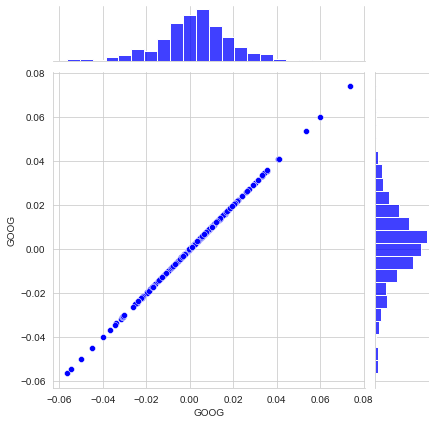

In [50]:
#Comparing google to itself to show a linear relationship
sns.jointplot(data=tech_rets,x='GOOG',y='GOOG',kind='scatter',color='blue')

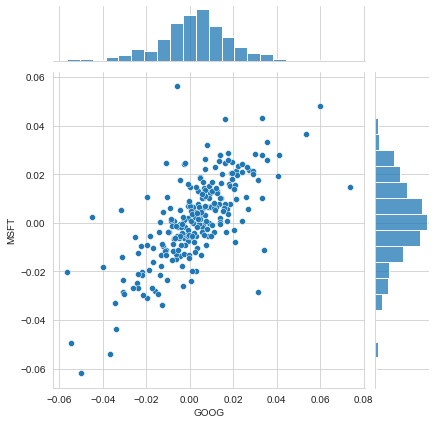

In [51]:
# Comparing the daily returns of Google and Microsoft
sns.jointplot(data=tech_rets,x='GOOG',y='MSFT',kind='scatter')

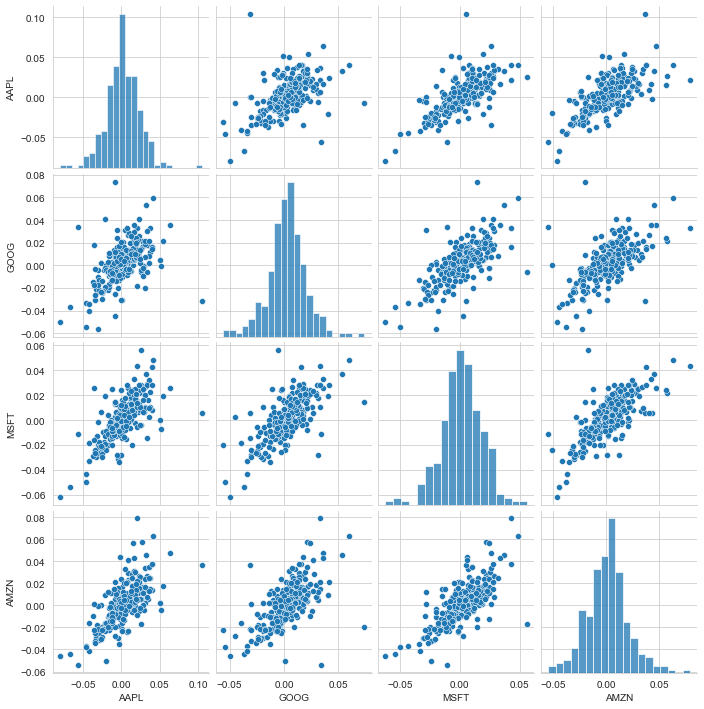

In [52]:
# Pairplot was used to see all comparisons
sns.pairplot(tech_rets.dropna())